In [152]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
fsize = 17
plt.rcParams['axes.labelsize'] = fsize
plt.rcParams['axes.titlesize'] = fsize
plt.rcParams['xtick.labelsize'] = fsize
plt.rcParams['ytick.labelsize'] = fsize
wsize=2

In [176]:
def sinh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    sinh_Lambda = np.diag(np.sinh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    sinh_A = V @ sinh_Lambda @ V_inv
    
    return sinh_A

def cosh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    cosh_Lambda = np.diag(np.cosh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    cosh_A = V @ cosh_Lambda @ V_inv
    
    return cosh_A

#tanh of matrix A
def tanh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    tanh_Lambda = np.diag(np.tanh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    tanh_A = V @ tanh_Lambda @ V_inv
    
    return tanh_A

#sech of matrix A
def sech(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    sech_Lambda = np.diag(1. / np.cosh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    sech_A = V @ sech_Lambda @ V_inv
    
    return sech_A

In [3]:
#double gaussian joint amplitude
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)

def beta_dg(num,k):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_dg(n,m-k))
        r.append(row)
        
    return Bc*np.array(r)

#vertical gaussian joint amplitude with t1 wide
def rnm_vg(n,m):
    return np.exp( -np.pi * (m**2) / 4 - ((Tc/Tp)**2) * np.pi * (n**2) / 4)

def beta_vg(num,k):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_vg(n,m-k))
        r.append(row)
        
    return Bc*np.array(r)



#vertical gaussian joint amplitude with t2 wide
def rnm_vg_alt(n,m):
    return np.exp( -np.pi * (n**2) / 4 - ((Tc/Tp)**2) * np.pi * (m**2) / 4)

def beta_vg_alt(num,k):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_vg_alt(n,m-k))
        r.append(row)
        
    return Bc*np.array(r)


In [4]:
Tc=0.001
Tp=1
Bc=1

B=beta_dg(30,k)
U, Q = sc.linalg.polar(B, side = "left")
T = np.matmul(tanh(Q),U)

# Plot the matrix
plt.imshow(np.transpose(np.abs(B)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()


NameError: name 'k' is not defined

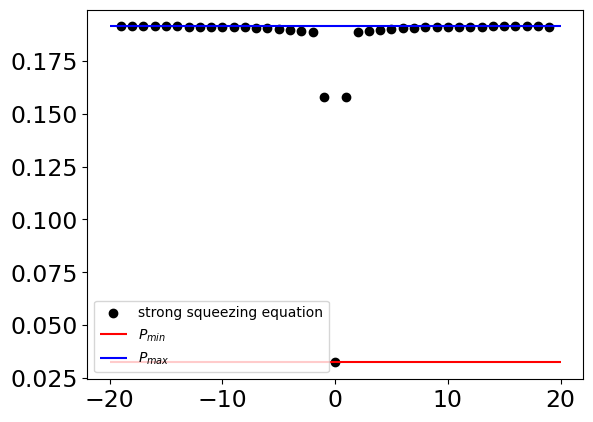

beta_circ =0.2
(0.19125965475635687-1.5625276345348084e-16j)
0.19126368336250754


In [5]:
klist=range(-19,20)
Plist=[]
Tc=0.1
Tp=1
Bc=0.2

for k in klist:
    
    B=beta_dg(30,k)
    
    U, Q = sc.linalg.polar(B, side = "left")
    detW = np.linalg.det(sech(Q))
    
    T = np.matmul(tanh(Q),U)
    
    L = 0.5*(T+np.transpose(T))
    
    LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
    N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
    Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
    Plist.append(Prob)
    
B = beta_dg(30,0)
U, Q = sc.linalg.polar(B, side = "left")
U, P = sc.linalg.polar(B, side = "right")

detW = np.linalg.det(sech(Q))
tanh2Q = np.matmul(tanh(Q),tanh(Q))
tanh2P = np.matmul(tanh(P),tanh(P))
P_min = (1 - detW)**2
det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))
P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))

    
norm = Plist[0]
plt.scatter(klist, np.real(Plist), color="black", label="strong squeezing equation")
plt.hlines(P_min, -20, 20, color="red", label="$P_{min}$")
plt.hlines(P_max, -20, 20, color="blue", label="$P_{max}$")
plt.legend()
#plt.ylim(bottom = -0.1, top = 1.1)
plt.show()
print('beta_circ ='+str(Bc))

print(norm)
print(P_max)

In [6]:
print(norm)

(0.19125965475635687-1.5625276345348084e-16j)


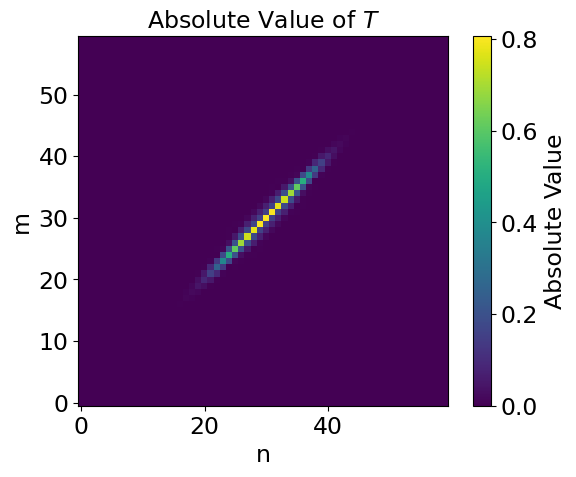

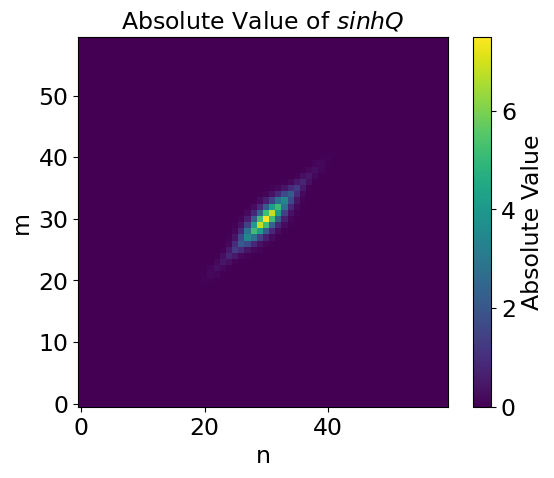

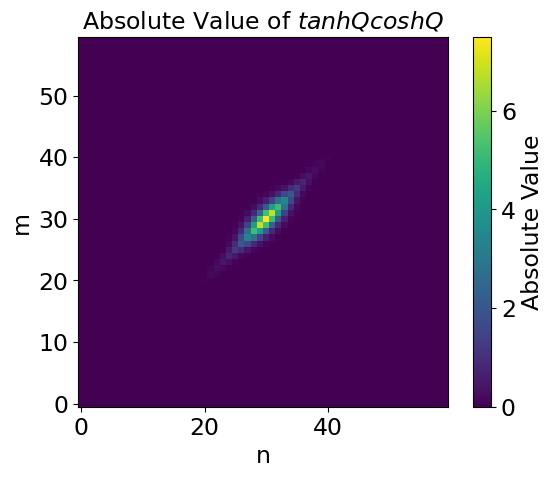

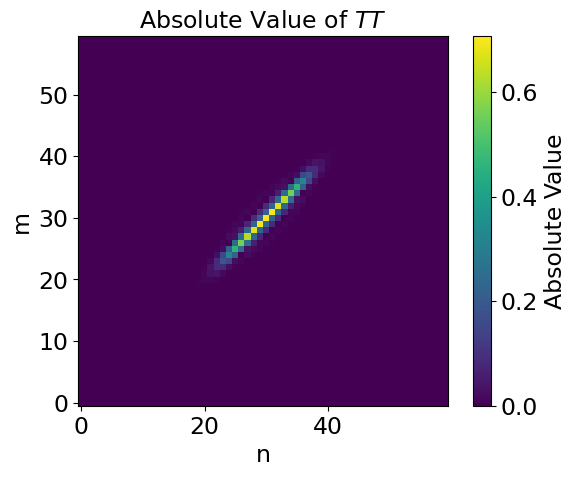

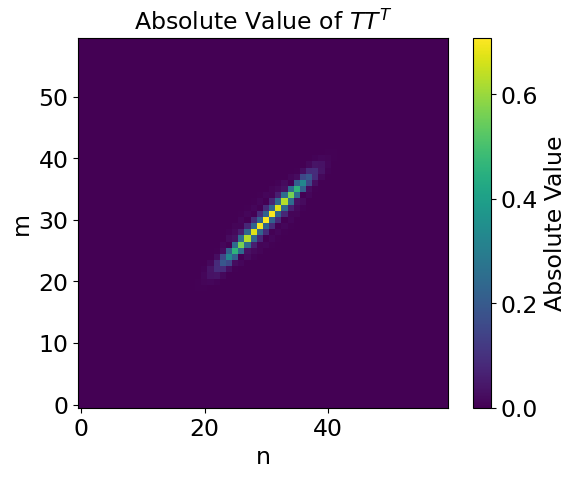

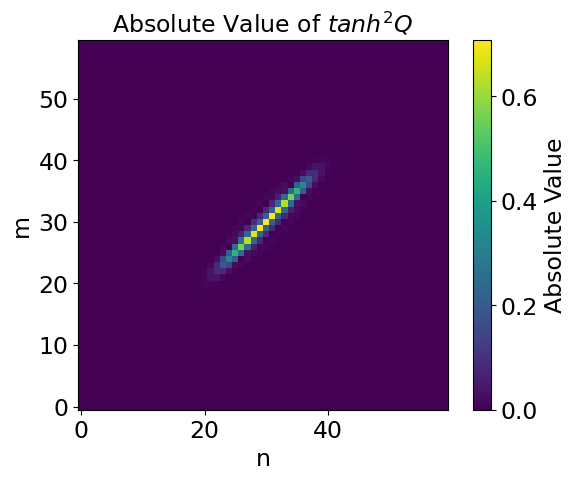

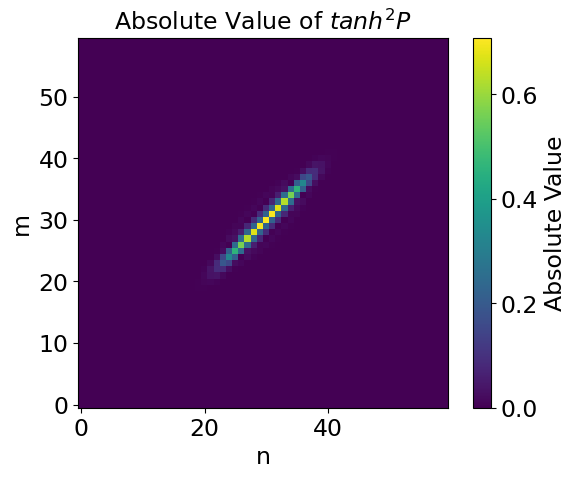

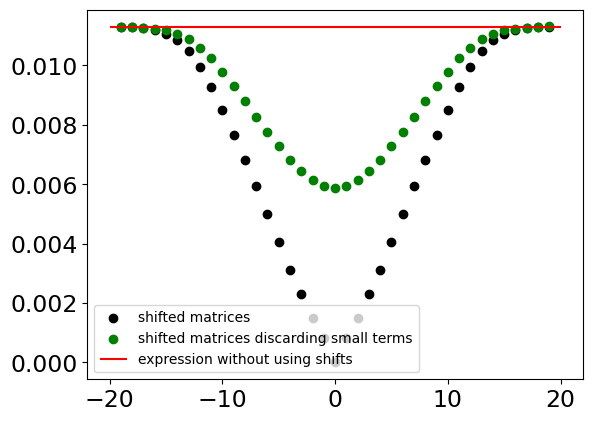

beta_circ =2


In [183]:
#plotting det to try to find normalization expression
klist=range(-19,20)
detlist=[]
sol_list=[]
Tc=0.1
Tp=1
Bc=2

for k in klist:
    
    B=beta_dg(30,k)
    
    U, Q = sc.linalg.polar(B, side = "left")
    detW = np.linalg.det(sech(Q))
    
    T = np.matmul(tanh(Q),U)
    
    L = 0.5*(T+np.transpose(T))
    
    LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
    N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
    det = (np.linalg.det(np.identity(len(L))-LdagL))
    #det = detW
    detlist.append(det)
    
    solmat = 0.25 * (np.matmul(np.transpose(np.conjugate(T)),T) + np.matmul(np.conjugate(T),np.transpose(T)))
    
    sol = (np.linalg.det(np.identity(len(L))-solmat))
           
    sol_list.append(sol)
    

B=beta_dg(30,0)
U, Q = sc.linalg.polar(B, side = "left")

T = np.matmul(tanh(Q),U)


plt.imshow(np.transpose(np.abs(T)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $T$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

plt.imshow(np.transpose(np.abs(sinh(Q))), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $sinhQ$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

plt.imshow(np.transpose(np.abs(np.matmul(tanh(Q),cosh(Q)))), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $tanhQ coshQ$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()
    

plt.imshow(np.transpose(np.abs(np.matmul(T,T))), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $TT$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

    


plt.imshow(np.transpose(np.abs(np.matmul(T,np.transpose(T)))), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $TT^T$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()
    
    
B=beta_dg(30,0)
    
U, Q = sc.linalg.polar(B, side = "left")
U, P = sc.linalg.polar(B, side = "right")

tanh2Q = np.matmul(tanh(Q),tanh(Q))
tanh2P = np.matmul(tanh(P),tanh(P))
#true_sol = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q + tanh2P))
true_sol = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))


plt.imshow(np.transpose(np.abs(tanh2Q)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $tanh^2Q$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

plt.imshow(np.transpose(np.abs(tanh2P)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $tanh^2P$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()


    
norm = Plist[0]
plt.scatter(klist, np.real(detlist), color="black", label="shifted matrices")
plt.scatter(klist, np.real(sol_list), color="green", label="shifted matrices discarding small terms")
plt.hlines(true_sol, -20, 20, color="red", label="expression without using shifts")
plt.legend()
#plt.ylim(bottom = 0, top = 1)
plt.show()
print('beta_circ ='+str(Bc))

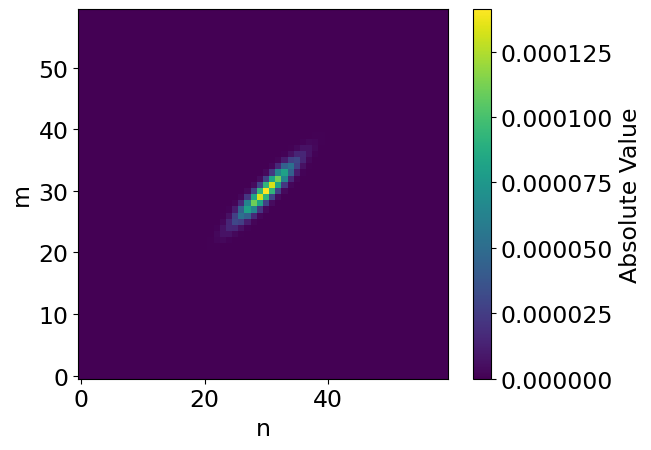

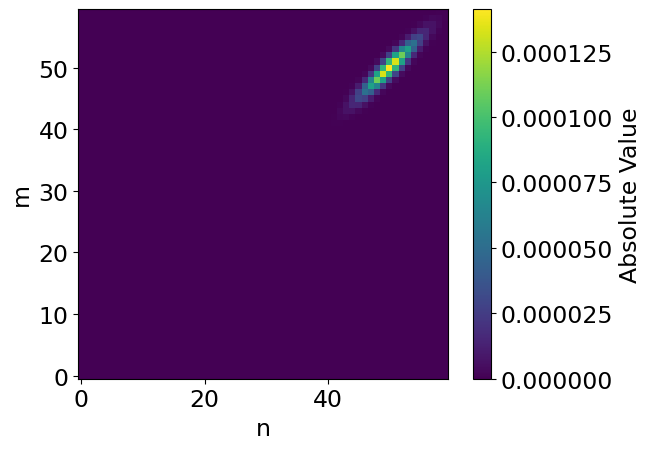

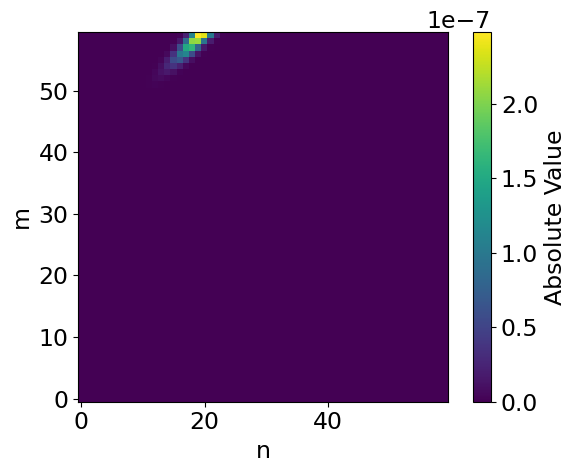

In [8]:
B=beta_dg(30,20)
    
U, Q = sc.linalg.polar(B, side = "left")
detW = np.linalg.det(sech(Q))
    
T = np.matmul(tanh(Q),U)
    
L = 0.5*(T+np.transpose(T))
    
LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
det = (np.linalg.det(np.identity(len(L))-LdagL))
#det = detW
detlist.append(det)

plt.imshow(np.transpose(np.abs(np.matmul(T,np.transpose(T)))), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
#plt.title(r"Absolute Value of $_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

plt.imshow(np.transpose(np.abs(np.matmul(np.transpose(T),T))), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
#plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()
    

plt.imshow(np.transpose(np.abs(np.matmul(T,T))), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
#plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

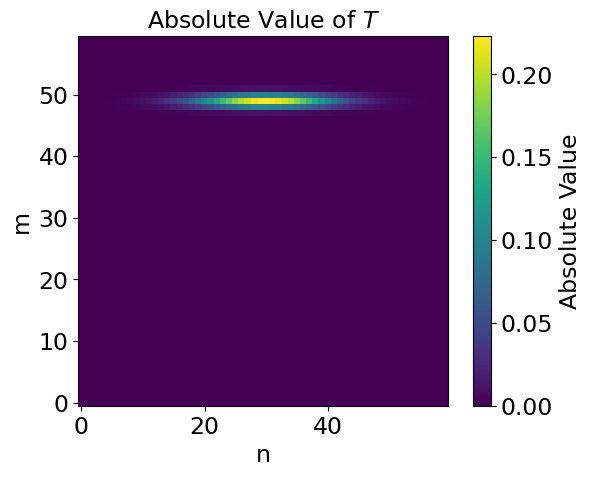

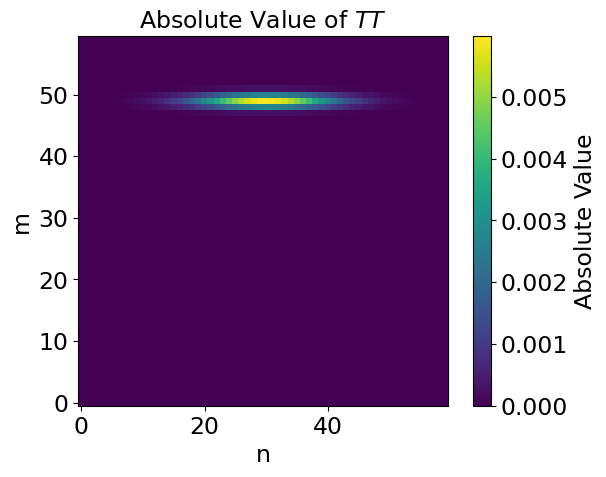

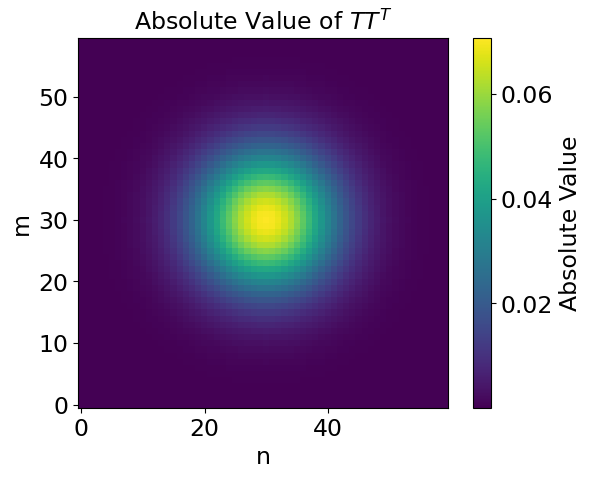

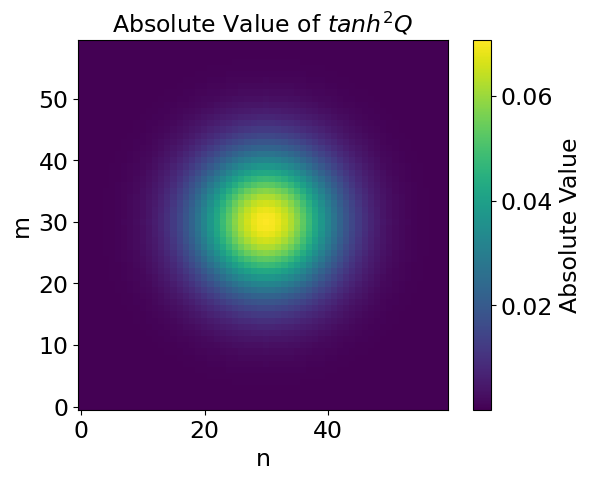

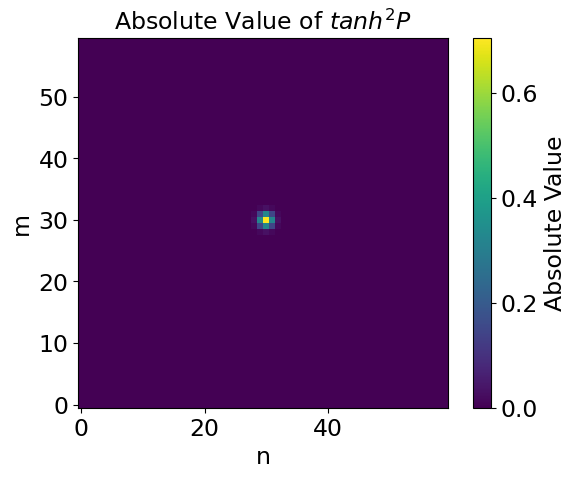

/Users/jasperkranias/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/Users/jasperkranias/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


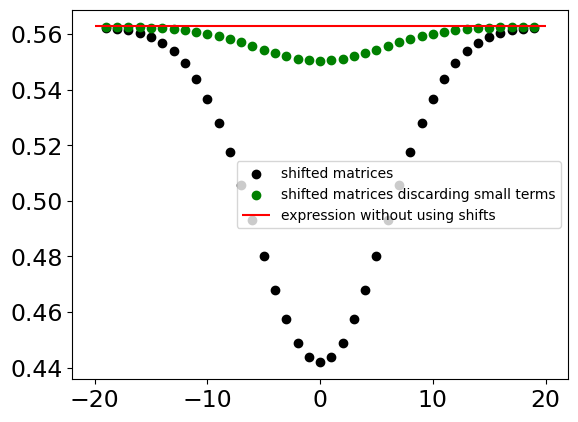

beta_circ =1


In [9]:
#normalization expression for vertical gaussian
klist=range(-19,20)
detlist=[]
sol_list=[]
Tc=0.1
Tp=1
Bc=1

for k in klist:
    
    B=beta_vg(30,k)
    
    U, Q = sc.linalg.polar(B, side = "left")
    detW = np.linalg.det(sech(Q))
    
    T = np.matmul(tanh(Q),U)
    
    L = 0.5*(T+np.transpose(T))
    
    LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
    N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
    det = (np.linalg.det(np.identity(len(L))-LdagL))
    #det = detW
    detlist.append(det)
    
    solmat = 0.25 * (np.matmul(np.transpose(np.conjugate(T)),T) + np.matmul(np.conjugate(T),np.transpose(T)))
    
    sol = (np.linalg.det(np.identity(len(L))-solmat))
           
    sol_list.append(sol)
    
    


plt.imshow(np.transpose(np.abs(T)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $T$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()
    

plt.imshow(np.transpose(np.abs(np.matmul(T,T))), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $TT$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

    


plt.imshow(np.transpose(np.abs(np.matmul(T,np.transpose(T)))), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $TT^T$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()
    
    
B=beta_vg(30,0)
    
U, Q = sc.linalg.polar(B, side = "left")
U, P = sc.linalg.polar(B, side = "right")

tanh2Q = np.matmul(tanh(Q),tanh(Q))
tanh2P = np.matmul(tanh(P),tanh(P))
#true_sol = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q + tanh2P))
true_sol = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))


plt.imshow(np.transpose(np.abs(tanh2Q)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $tanh^2Q$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

plt.imshow(np.transpose(np.abs(tanh2P)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $tanh^2P$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()


    
norm = Plist[0]
plt.scatter(klist, np.real(detlist), color="black", label="shifted matrices")
plt.scatter(klist, np.real(sol_list), color="green", label="shifted matrices discarding small terms")
plt.hlines(true_sol, -20, 20, color="red", label="expression without using shifts")
plt.legend()
#plt.ylim(bottom = 0, top = 1)
plt.show()
print('beta_circ ='+str(Bc))

/Users/jasperkranias/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


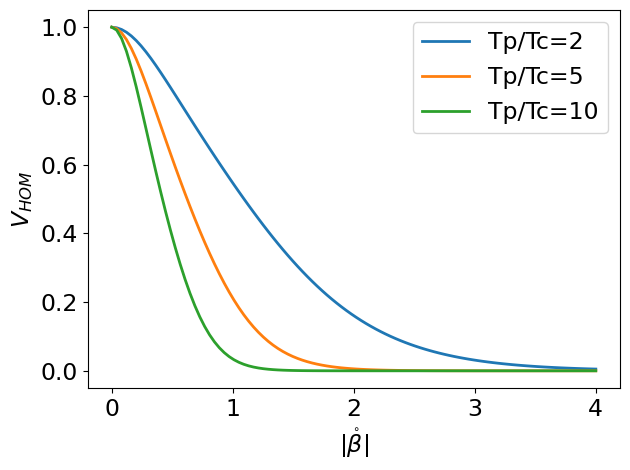

In [154]:
#plot visibility as function of Bc

Bc_vals = np.linspace(0.001, 4, 100)

ratios=[2,5,10]

Tp=1

for rat in ratios:
    
    Tc = Tp / rat
    
    V_list = []
     
    for bc in Bc_vals:
        Bc = bc
    
        B = beta_dg(30,0)
        U, Q = sc.linalg.polar(B, side = "left")
        U, P = sc.linalg.polar(B, side = "right")

        detW = np.linalg.det(sech(Q))
    
        T = np.matmul(tanh(Q),U)
        L = 0.5*(T+np.transpose(T))    
        LdagL=np.dot(np.transpose(np.conjugate(L)),L)   
        P_min = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
    
    
        tanh2Q = np.matmul(tanh(Q),tanh(Q))
        tanh2P = np.matmul(tanh(P),tanh(P))
        #P_min = (1 - detW)**2
#         det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))
#         P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))
        det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q))
        P_max = 1+(detW**2)*(1-2/det_max)

        V_list.append((P_max - P_min) / P_max)
        
    plt.plot(Bc_vals,V_list, label="Tp/Tc="+str(rat), linewidth=wsize)

        #print(P_min)
        #print(P_max)

    

plt.xlabel(r"$|\mathring{\beta}|$")
plt.ylabel("$V_{HOM}$")
plt.tight_layout()
plt.legend(fontsize=fsize)
plt.savefig("HOM_V.pdf")
plt.show()

In [60]:
#double gaussian joint amplitude
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)

def rnm_dg_unshifted(n,m,w1,w2):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4 + 1j*w1*n*np.sqrt(np.pi)*Tc + 1j*w2*m*np.sqrt(np.pi)*Tc)


def beta_dg_f(num,k,f):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_dg(n/f,(m-k)/f))
        r.append(row)
        
    return Bc / f *np.array(r)

#vertical gaussian joint amplitude with t1 wide
def rnm_vg(n,m):
    return np.exp( -np.pi * (m**2) / 4 - ((Tc/Tp)**2) * np.pi * (n**2) / 4)

def beta_vg_f(num,k,f):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_vg(n/f,(m-k)/f))
        r.append(row)
        
    return Bc / f *np.array(r)


# joint amplitude when we don't take the center frequencies to zero, instead centeerd at w1,w2
def beta_dg_f_unshifted(num,k,f,w1,w2):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_dg_unshifted(n/f,(m-k)/f,w1,w2))
        r.append(row)
        
    return Bc / f *np.array(r)


#vertical gaussian joint amplitude with t2 wide
def rnm_vg_alt(n,m):
    return np.exp( -np.pi * (n**2) / 4 - ((Tc/Tp)**2) * np.pi * (m**2) / 4)

def beta_vg_alt_f(num,k,f):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_vg_alt(n/f,(m-k)/f))
        r.append(row)
        
    return Bc/ f *np.array(r)

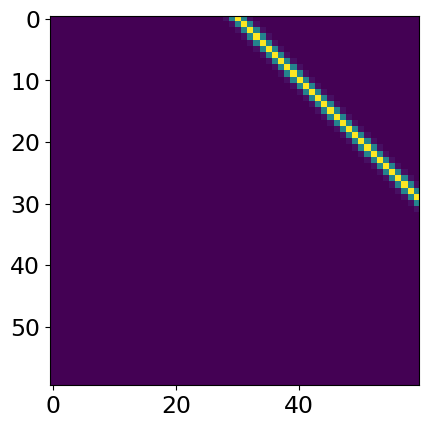

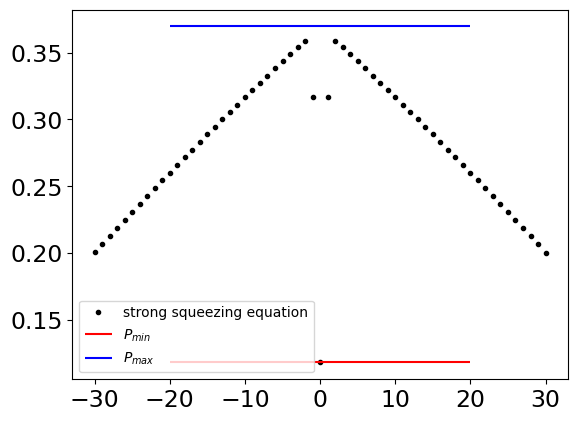

beta_circ =0.1
(0.20041267085847725+1.7275464997941756e-15j)
0.369568080482523


In [136]:
# plotting Dip with different fineness
ratio = 1000

Tp=1
Tc = Tp / ratio
Bc=0.1
fine_param = 1
window_size = 30
tau_max = 30

klist=range(-tau_max * fine_param, (tau_max+1) * fine_param)
Plist=[]

mat_size = window_size * fine_param

for k in klist:
    
    B=beta_dg_f(mat_size,k,fine_param)
    
    U, Q = sc.linalg.polar(B, side = "left")
    detW = np.linalg.det(sech(Q))
    
    T = np.matmul(tanh(Q),U)
    
#     if k == 40:
#         plt.imshow(np.abs(T), cmap='viridis', interpolation='none')
#         plt.show()

    
    L = 0.5*(T+np.transpose(T))
    
    LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
    N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
    Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
    Plist.append(Prob)
    
plt.imshow(np.abs(T), cmap='viridis', interpolation='none')
plt.show()

    
B = beta_dg_f(window_size,0,fine_param)
U, Q = sc.linalg.polar(B, side = "left")
U, P = sc.linalg.polar(B, side = "right")

detW = np.linalg.det(sech(Q))
tanh2Q = np.matmul(tanh(Q),tanh(Q))
tanh2P = np.matmul(tanh(P),tanh(P))
P_min = (1 - detW)**2
det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q))
P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))


norm = Plist[0]
plt.plot(klist, np.real(Plist), color="black", label="strong squeezing equation", marker=".", linestyle="none")
plt.hlines(P_min, -20, 20, color="red", label="$P_{min}$")
plt.hlines(P_max, -20, 20, color="blue", label="$P_{max}$")
plt.legend()
#plt.ylim(bottom = -0.1, top = 1.1)
plt.show()
print('beta_circ ='+str(Bc))

print(norm)
print(P_max)

In [ ]:
#plot with multiple Bc values 

Tc=0.1
Tp=1
fine_param = 2
klist=range(-7 * fine_param, 8 * fine_param)
mat_size = 10 * fine_param

def dg_dip(bc):
    
    Bc = bc
    
    def beta_dg_f(num,k,f):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_dg(n/f,(m-k)/f))
            r.append(row)
        
        return Bc / f *np.array(r)
    
    Plist=[]

    for k in klist:
    
        B=beta_dg_f(mat_size,k,fine_param)
    
        U, Q = sc.linalg.polar(B, side = "left")
        detW = np.linalg.det(sech(Q))
    
        T = np.matmul(tanh(Q),U)
    
        L = 0.5*(T+np.transpose(T))
    
        LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
        N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
        Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
        Plist.append(Prob)

    
    B = beta_dg_f(30,0,1)
    U, Q = sc.linalg.polar(B, side = "left")
    U, P = sc.linalg.polar(B, side = "right")

    detW = np.linalg.det(sech(Q))
    tanh2Q = np.matmul(tanh(Q),tanh(Q))
    tanh2P = np.matmul(tanh(P),tanh(P))
    P_min = (1 - detW)**2
    det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))
    P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))
    
    return np.real(Plist/P_max)


B=beta_dg_f(mat_size,0,fine_param)

plt.imshow(np.transpose(np.abs(B)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

Pvals_1 = dg_dip(0.1)
Pvals_5 = dg_dip(0.5)
Pvals_10 = dg_dip(1)

In [ ]:
plt.plot(np.array(klist)/fine_param, Pvals_1, color="black", label=r"$|\mathring{\beta}|=0.1$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_5, color="blue", label=r"$|\mathring{\beta}|=0.5$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_10, color="darkorange", label=r"$|\mathring{\beta}|=1$", marker=".")
plt.xlabel(r"$\tau_H/\tau$")
plt.ylabel(r"$\mathcal{P}_{HOM}(\tau_H)$")
plt.legend()
plt.tight_layout()
plt.savefig("HOM_Dip.pdf")
plt.show()

    

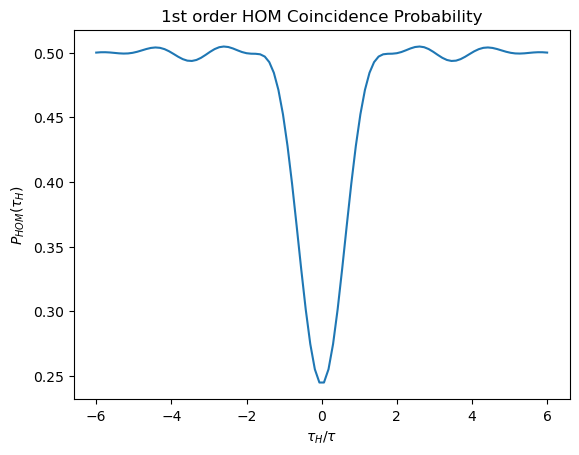

In [204]:
#trying first order calculation with phase offset for higer resolution

#adjusted to include center frequency offset
def Dmat(dim, tau):
    Dmat=[] 
    for n in range(dim):
        row=[]
        for m in range(dim):
            row.append(np.exp((0+1j)*delta_omega*m)*np.sinc(tau+n-m))
        Dmat.append(row)
    return Dmat


def order1(Tmat,tau):
    dim=len(Tmat)
    D=Dmat(dim,tau)
    return detW**2/2 * (N-np.trace(np.linalg.multi_dot([Tdag, D, np.transpose(T), np.conjugate(D)])))

def beta_dg_f(num,k,f):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_dg(n/f,(m-k)/f))
        r.append(row)
        
    return Bc / f *np.array(r)


Tc=0.1
Tp=1
fine_param = 1
klist=range(-7 * fine_param, 8 * fine_param)
mat_size = 30 * fine_param


B=beta_dg_f(30,0,fine_param)
U, Q = sc.linalg.polar(B, side = "left")
tanhQ = tanh(Q)
detW=np.linalg.det(sech(Q))
T=np.matmul(tanhQ,U)
Tdag=np.transpose(np.conjugate(T))
N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))


delta_omega = 4

tlist=np.linspace(-6,6,100)
plist1=[]
for t in tlist:
    plist1.append(np.real(order1(T,t)))
    
    
plt.plot(tlist,plist1/(detW**2 * N))
plt.xlabel(r"$\tau_H/\tau$")
plt.ylabel(r"$P_{HOM}(\tau_H)$")
plt.title("1st order HOM Coincidence Probability")
plt.show()

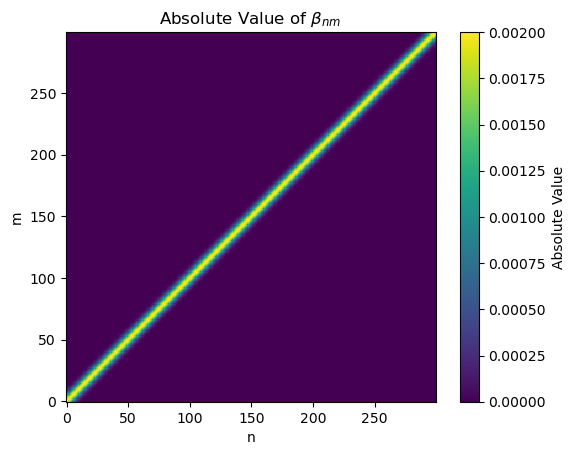

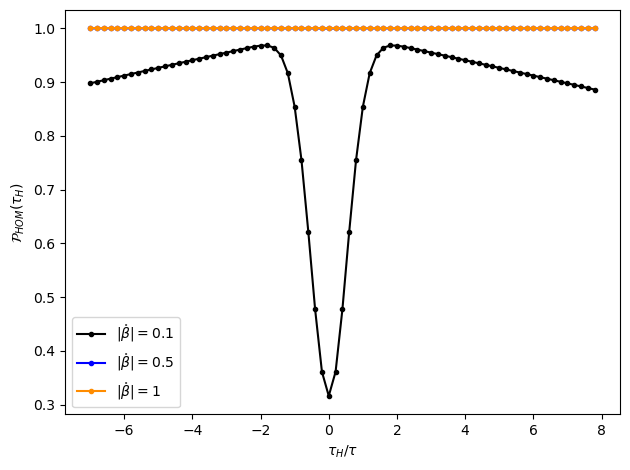

In [182]:
#plot with multiple Bc values in CW limit

Tc=0.001
Tp=1
fine_param = 5
klist=range(-7 * fine_param, 8 * fine_param)

mat_size = 30 * fine_param

def dg_dip(bc):
    
    Bc = bc
    
    def beta_dg_f(num,k,f):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_dg(n/f,(m-k)/f))
            r.append(row)
        
        return Bc / f *np.array(r)
    
    Plist=[]

    for k in klist:
    
        B=beta_dg_f(mat_size,k,fine_param)
    
        U, Q = sc.linalg.polar(B, side = "left")
        detW = np.linalg.det(sech(Q))
    
        T = np.matmul(tanh(Q),U)
    
        L = 0.5*(T+np.transpose(T))
    
        LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
        N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
        Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
        Plist.append(Prob)

    
    B = beta_dg_f(30,0,1)
    U, Q = sc.linalg.polar(B, side = "left")
    U, P = sc.linalg.polar(B, side = "right")

    detW = np.linalg.det(sech(Q))
    tanh2Q = np.matmul(tanh(Q),tanh(Q))
    tanh2P = np.matmul(tanh(P),tanh(P))
    P_min = (1 - detW)**2
    det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))
    P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))
    
    return np.real(Plist/P_max)

B=beta_dg_f(mat_size,0,fine_param)

plt.imshow(np.transpose(np.abs(B)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

Pvals_1 = dg_dip(0.1)
Pvals_5 = dg_dip(0.5)
Pvals_10 = dg_dip(1)

plt.plot(np.array(klist)/fine_param, Pvals_1, color="black", label=r"$|\mathring{\beta}|=0.1$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_5, color="blue", label=r"$|\mathring{\beta}|=0.5$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_10, color="darkorange", label=r"$|\mathring{\beta}|=1$", marker=".")
plt.xlabel(r"$\tau_H/\tau$")
plt.ylabel(r"$\mathcal{P}_{HOM}(\tau_H)$")
plt.legend()
plt.tight_layout()
#plt.savefig("HOM_Dip.pdf")
plt.show()

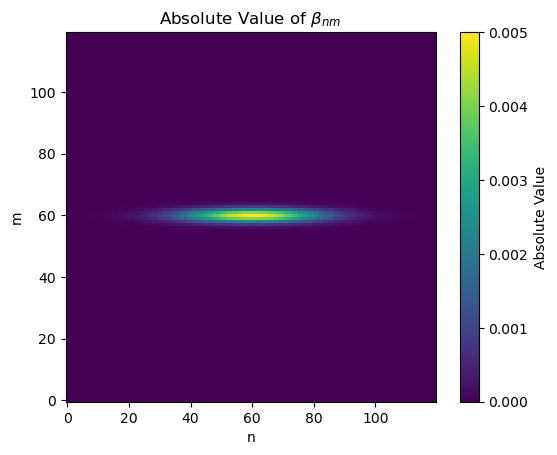

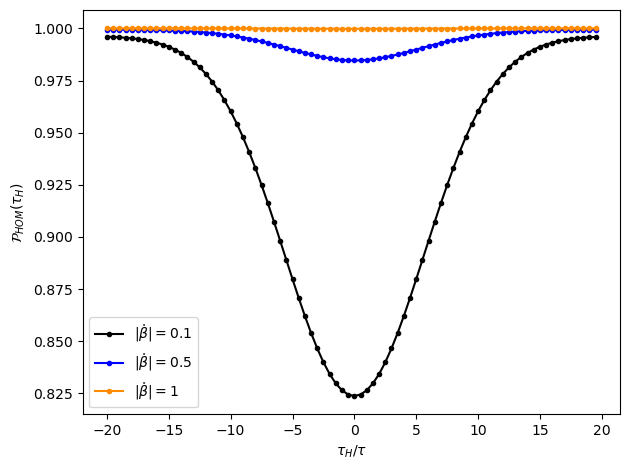

In [173]:
#plot with multiple Bc values for vertical dg

Tc=0.1
Tp=1
fine_param = 2
klist=range(-20 * fine_param, 20 * fine_param)

mat_size = 30 * fine_param

def vg_dip(bc):
    
    Bc = bc
    
    def beta_vg_f(num,k,f):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_vg(n/f,(m-k)/f))
            r.append(row)
        
        return Bc / f *np.array(r)
    
    Plist=[]

    for k in klist:
    
        B=beta_vg_f(mat_size,k,fine_param)
    
        U, Q = sc.linalg.polar(B, side = "left")
        detW = np.linalg.det(sech(Q))
    
        T = np.matmul(tanh(Q),U)
    
        L = 0.5*(T+np.transpose(T))
    
        LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
        N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
        Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
        Plist.append(Prob)

    
    B = beta_vg_f(30,0,1)
    U, Q = sc.linalg.polar(B, side = "left")
    U, P = sc.linalg.polar(B, side = "right")

    detW = np.linalg.det(sech(Q))
    tanh2Q = np.matmul(tanh(Q),tanh(Q))
    tanh2P = np.matmul(tanh(P),tanh(P))
    P_min = (1 - detW)**2
    det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))
    P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))
    
    return np.real(Plist/P_max)

B=beta_vg_f(mat_size,0,fine_param)

plt.imshow(np.transpose(np.abs(B)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

Pvals_1 = vg_dip(0.1)
Pvals_5 = vg_dip(0.5)
Pvals_10 =vg_dip(1)

plt.plot(np.array(klist)/fine_param, Pvals_1, color="black", label=r"$|\mathring{\beta}|=0.1$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_5, color="blue", label=r"$|\mathring{\beta}|=0.5$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_10, color="darkorange", label=r"$|\mathring{\beta}|=1$", marker=".")
plt.xlabel(r"$\tau_H/\tau$")
plt.ylabel(r"$\mathcal{P}_{HOM}(\tau_H)$")
plt.legend()
plt.tight_layout()
#plt.savefig("HOM_Dip.pdf")
plt.show()

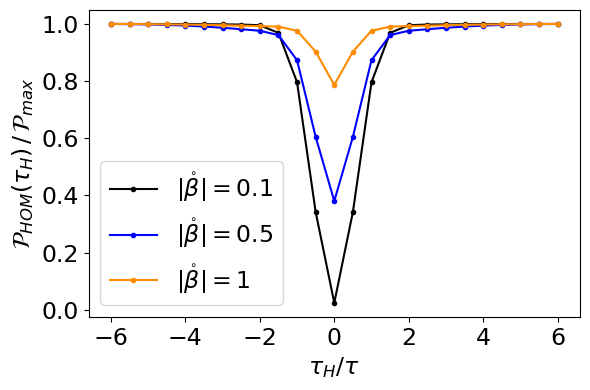

In [138]:
#plot with multiple Bc values for unshifted joint amplitude
ratio = 5

Tp=1
Tc = Tp/ ratio
fine_param = 2
klist=range(-6 * fine_param, (6 * fine_param)+1)

w1 = 0
w2 = 10

#def rnm_dg_unshifted(n,m,w1,w2):
 #   return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4 + 1j*w1*n*np.sqrt(np.pi)*Tc + 1j*w2*m*np.sqrt(np.pi)*Tc)


def rnm_dg_f(n,m,w1,w2):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)  
    
def dg_dip(bc):
    
    Bc = bc
    
    '''
    def beta_dg_f_unshifted(num,k,f,w1,w2):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_dg_unshifted(n/f,(m-k)/f,w1,w1))
            r.append(row)
        
        return Bc / f *np.array(r)
    '''
    def beta_dg_f(num,k,f):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_dg_f(n/f,(m-k)/f,w1,w1))
            r.append(row)
        
        return Bc / f *np.array(r)
    
    Plist=[]

    mat_size = 30 * fine_param

    for k in klist:
    
        B=beta_dg_f(mat_size,k,fine_param)
    
        U, Q = sc.linalg.polar(B, side = "left")
        detW = np.linalg.det(sech(Q))
    
        T = np.matmul(tanh(Q),U)
    
        L = 0.5*(T+np.transpose(T))
    
        LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
        N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
        Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
        Plist.append(Prob)

    
    B = beta_dg_f(30,0,1)
    U, Q = sc.linalg.polar(B, side = "left")
    U, P = sc.linalg.polar(B, side = "right")

    detW = np.linalg.det(sech(Q))
    tanh2Q = np.matmul(tanh(Q),tanh(Q))
    tanh2P = np.matmul(tanh(P),tanh(P))
    P_min = (1 - detW)**2
    det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))
    
    #P_max equation no longer applies
    #P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))
    P_max = Plist[0]
    
    return np.real(Plist/P_max)

Pvals_1 = dg_dip(0.1)
Pvals_5 = dg_dip(0.5)
Pvals_10 = dg_dip(1)

plt.figure(figsize=(6,4))
plt.plot(np.array(klist)/fine_param, Pvals_1, color="black", label=r"$|\mathring{\beta}|=0.1$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_5, color="blue", label=r"$|\mathring{\beta}|=0.5$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_10, color="darkorange", label=r"$|\mathring{\beta}|=1$", marker=".")
plt.xlabel(r"$\tau_H/\tau$")
plt.ylabel(r"$\mathcal{P}_{HOM}(\tau_H)\,/\,\mathcal{P}_{max}$")
plt.xticks(np.arange(-6,7, step=2))
plt.legend(fontsize=fsize)
#, bbox_to_anchor=(0.45, 0.48)
plt.tight_layout()
#plt.savefig("HOM_Dip.pdf")
#plt.savefig("HOM_Dip_short_pulse.pdf")
plt.show()

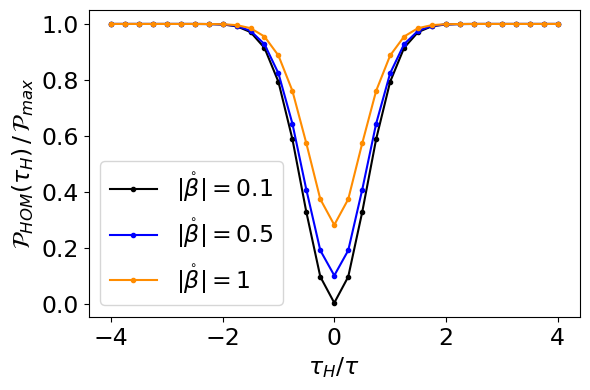

In [19]:
#plot with multiple Bc values for unshifted joint amplitude
ratio = 1

Tp = 1
Tc = Tp/ ratio
fine_param = 4
klist=range(-4 * fine_param, (4 * fine_param)+1)

w1 = 0
w2 = 10

#def rnm_dg_unshifted(n,m,w1,w2):
 #   return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4 + 1j*w1*n*np.sqrt(np.pi)*Tc + 1j*w2*m*np.sqrt(np.pi)*Tc)


def rnm_dg_f(n,m,w1,w2):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)
    
def dg_dip(bc):
    
    
    Bc = bc
    
    '''
    def beta_dg_f_unshifted(num,k,f,w1,w2):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_dg_unshifted(n/f,(m-k)/f,w1,w1))
            r.append(row)
        
        return Bc / f *np.array(r)
    '''
    def beta_dg_f(num,k,f):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_dg_f(n/f,(m-k)/f,w1,w1))
            r.append(row)
        
        return Bc / f *np.array(r)
    
    Plist=[]

    mat_size = 30 * fine_param

    for k in klist:
    
        B=beta_dg_f(mat_size,k,fine_param)
    
        U, Q = sc.linalg.polar(B, side = "left")
        detW = np.linalg.det(sech(Q))
    
        T = np.matmul(tanh(Q),U)
    
        L = 0.5*(T+np.transpose(T))
    
        LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
        N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
        Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
        Plist.append(Prob)

    
    B = beta_dg_f(30,0,1)
    U, Q = sc.linalg.polar(B, side = "left")
    U, P = sc.linalg.polar(B, side = "right")

    detW = np.linalg.det(sech(Q))
    tanh2Q = np.matmul(tanh(Q),tanh(Q))
    tanh2P = np.matmul(tanh(P),tanh(P))
    P_min = (1 - detW)**2
    det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))
    
    #P_max equation no longer applies
    #P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))
    P_max = Plist[0]
    
    return np.real(Plist/P_max)

Pvals_1 = dg_dip(0.1)
Pvals_5 = dg_dip(0.5)
Pvals_10 = dg_dip(1)

plt.figure(figsize=(6,4))
plt.plot(np.array(klist)/fine_param, Pvals_1, color="black", label=r"$|\mathring{\beta}|=0.1$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_5, color="blue", label=r"$|\mathring{\beta}|=0.5$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_10, color="darkorange", label=r"$|\mathring{\beta}|=1$", marker=".")
plt.xlabel(r"$\tau_H/\tau$")
plt.ylabel(r"$\mathcal{P}_{HOM}(\tau_H)\,/\,\mathcal{P}_{max}$")
plt.xticks(np.arange(-4,5, step=2))
plt.legend(fontsize=fsize)
#, bbox_to_anchor=(0.45, 0.48)
plt.tight_layout()
#plt.savefig("HOM_Dip.pdf")
plt.savefig("HOM_Dip_short_pulse.pdf")
plt.show()

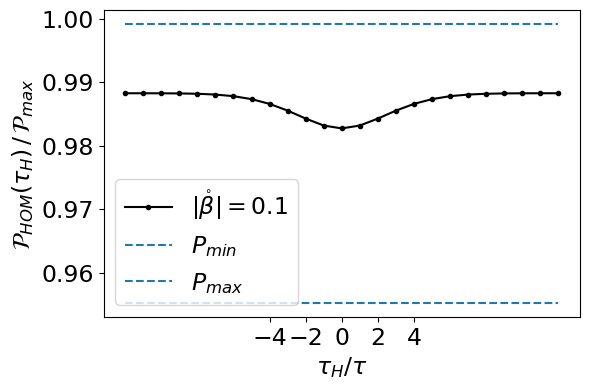

In [58]:
#ploting for vertical dg
ratio = 5

Tp = 1
Tc = Tp/ ratio
fine_param = 1
klist=range(-12 * fine_param, (12 * fine_param)+1)

w1 = 0
w2 = 10

#def rnm_dg_unshifted(n,m,w1,w2):
 #   return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4 + 1j*w1*n*np.sqrt(np.pi)*Tc + 1j*w2*m*np.sqrt(np.pi)*Tc)
 

def rnm_vg_f(n,m,w1,w2):
    return np.exp( -np.pi * (m**2) / 4 - ((Tc/Tp)**2) * np.pi * (n**2) / 4)
    
def vg_dip(bc):
    
    Bc = bc
    
    '''
    def beta_dg_f_unshifted(num,k,f,w1,w2):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_dg_unshifted(n/f,(m-k)/f,w1,w1))
            r.append(row)
        
        return Bc / f *np.array(r)
    '''
    def beta_vg_f(num,k,f):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_vg_f(n/f,(m-k)/f,w1,w1))
            r.append(row)
        
        return Bc / f *np.array(r)
    
    Plist=[]

    mat_size = 30 * fine_param

    for k in klist:
    
        B=beta_vg_f(mat_size,k,fine_param)
    
        U, Q = sc.linalg.polar(B, side = "left")
        detW = np.linalg.det(sech(Q))
    
        T = np.matmul(tanh(Q),U)
    
        L = 0.5*(T+np.transpose(T))
    
        LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
        N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
        Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
        Plist.append(Prob)

    
    B = beta_vg_f(30,0,1)
    U, Q = sc.linalg.polar(B, side = "left")
    U, P = sc.linalg.polar(B, side = "right")

    detW = np.linalg.det(sech(Q))
    tanh2Q = np.matmul(tanh(Q),tanh(Q))
    tanh2P = np.matmul(tanh(P),tanh(P))
    P_min = (1 - detW)**2
    det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q))
    
    #P_max equation no longer applies
    #P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))
    #P_max = Plist[0]
    
    #unnormalized to compare with P max expression
    P_max = 1.0 
    
    return np.real(np.array(Plist) / P_max)

Pvals_1 = vg_dip(1)

P_min = (1 - detW)**2
det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q))
P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))

plt.figure(figsize=(6,4))
plt.plot(np.array(klist)/fine_param, Pvals_1, color="black", label=r"$|\mathring{\beta}|=0.1$", marker=".")
plt.hlines(P_min, np.array(klist)[0]/fine_param, np.array(klist)[-1]/fine_param, linestyle="dashed", label="$P_{min}$")
plt.hlines(P_max, np.array(klist)[0]/fine_param, np.array(klist)[-1]/fine_param, linestyle="dashed", label="$P_{max}$")
plt.xlabel(r"$\tau_H/\tau$")
plt.ylabel(r"$\mathcal{P}_{HOM}(\tau_H)\,/\,\mathcal{P}_{max}$")
plt.xticks(np.arange(-4,5, step=2))
plt.legend(fontsize=fsize)
#, bbox_to_anchor=(0.45, 0.48)
plt.tight_layout()
plt.show()

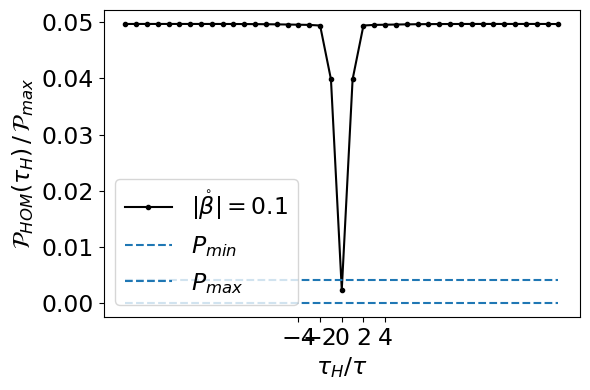

In [97]:
#plotting dip for CW limit
ratio = 10
window_size = 30

Tp = 1
Tc = Tp/ ratio
fine_param = 1
klist=range(-20 * fine_param, (20 * fine_param)+1)

w1 = 0
w2 = 10

#def rnm_dg_unshifted(n,m,w1,w2):
 #   return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4 + 1j*w1*n*np.sqrt(np.pi)*Tc + 1j*w2*m*np.sqrt(np.pi)*Tc)


def rnm_dg_f(n,m,w1,w2):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)
    
def dg_dip(bc):
    
    
    Bc = bc
    
    '''
    def beta_dg_f_unshifted(num,k,f,w1,w2):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_dg_unshifted(n/f,(m-k)/f,w1,w1))
            r.append(row)
        
        return Bc / f *np.array(r)
    '''
    def beta_dg_f(num,k,f):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_dg_f(n/f,(m-k)/f,w1,w1))
            r.append(row)
        
        return Bc / f *np.array(r)
    
    Plist=[]

    mat_size = window_size * fine_param

    for k in klist:
    
        B=beta_dg_f(mat_size,k,fine_param)
    
        U, Q = sc.linalg.polar(B, side = "left")
        detW = np.linalg.det(sech(Q))
    
        T = np.matmul(tanh(Q),U)
    
        L = 0.5*(T+np.transpose(T))
    
        LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
        N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
        Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
        Plist.append(Prob)

    
    B = beta_dg_f(mat_size,0,fine_param)
    U, Q = sc.linalg.polar(B, side = "left")
    U, P = sc.linalg.polar(B, side = "right")

    detW = np.linalg.det(sech(Q))
    tanh2Q = np.matmul(tanh(Q),tanh(Q))
    tanh2P = np.matmul(tanh(P),tanh(P))
    P_min = (1 - detW)**2
    det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))
    
    #P_max equation no longer applies
    #P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))
    P_max = 1
    
    return np.real(np.array(Plist)/P_max)

Pvals_1 = dg_dip(0.1)
# Pvals_5 = dg_dip(0.2)
# Pvals_10 = dg_dip(0.3)

P_min = (1 - detW)**2
det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q))
P_max = 1+(detW**2)*(1-2/np.sqrt(det_max))

plt.figure(figsize=(6,4))
plt.plot(np.array(klist)/fine_param, Pvals_1, color="black", label=r"$|\mathring{\beta}|=0.1$", marker=".")
# plt.plot(np.array(klist)/fine_param, Pvals_5, color="blue", label=r"$|\mathring{\beta}|=0.5$", marker=".")
# plt.plot(np.array(klist)/fine_param, Pvals_10, color="darkorange", label=r"$|\mathring{\beta}|=1$", marker=".")
plt.hlines(P_min, np.array(klist)[0]/fine_param, np.array(klist)[-1]/fine_param, linestyle="dashed", label="$P_{min}$")
plt.hlines(P_max, np.array(klist)[0]/fine_param, np.array(klist)[-1]/fine_param, linestyle="dashed", label="$P_{max}$")
plt.xlabel(r"$\tau_H/\tau$")
plt.ylabel(r"$\mathcal{P}_{HOM}(\tau_H)\,/\,\mathcal{P}_{max}$")
plt.xticks(np.arange(-4, 5, step=2))
plt.legend(fontsize=fsize)
#, bbox_to_anchor=(0.45, 0.48)
plt.tight_layout()
#plt.savefig("HOM_Dip.pdf")
#plt.savefig("HOM_Dip_short_pulse.pdf")
plt.show()

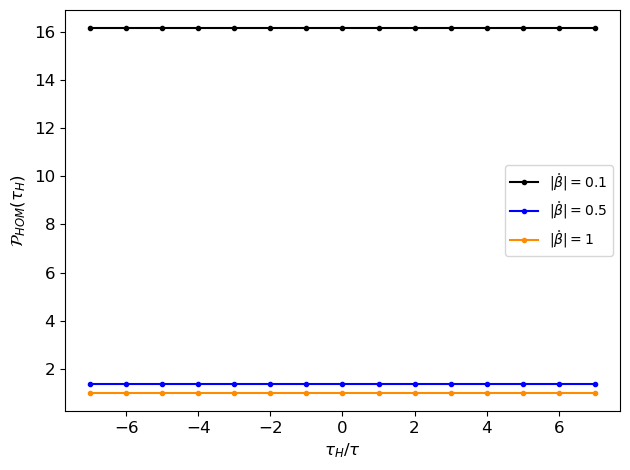

In [19]:
#plot with multiple Bc values fopr nondegenerate input

Tc=0.1
Tp=1
fine_param = 1
klist=range(-7 * fine_param, 8 * fine_param)

def dg_dip(bc):
    
    Bc = bc
    
    def beta_dg_f(num,k,f):
        r=[]
        for n in range(-num,num):
            row=[]
            for m in range(-num,num):
                row.append(rnm_dg(n/f,(m-k)/f))
            r.append(row)
        
        return Bc / f *np.array(r)
    
    Plist=[]

    mat_size = 30 * fine_param

    for k in klist:
    
        B=beta_dg_f(mat_size,k,fine_param)
    
        U, Q = sc.linalg.polar(B, side = "left")
        detW = np.linalg.det(sech(Q))
    
        T = np.matmul(tanh(Q),U)
    
        L = 0.5*(T)
    
        LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
        N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
        Prob = 1+(detW**2)*(1-2/np.linalg.det(np.identity(len(L))-LdagL))
        Plist.append(Prob)

    
    B = beta_dg_f(30,0,1)
    U, Q = sc.linalg.polar(B, side = "left")
    U, P = sc.linalg.polar(B, side = "right")

    detW = np.linalg.det(sech(Q))
    tanh2Q = np.matmul(tanh(Q),tanh(Q))
    tanh2P = np.matmul(tanh(P),tanh(P))
    P_min = (1 - detW)**2
    det_max = np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2Q)) * np.linalg.det(np.identity(len(Q)) - 0.25*(tanh2P))
    P_max = 1+(detW**2)*(1-2/det_max)
    
    return np.real(Plist/P_max)

Pvals_1 = dg_dip(0.1)
Pvals_5 = dg_dip(0.5)
Pvals_10 = dg_dip(1)

plt.plot(np.array(klist)/fine_param, Pvals_1, color="black", label=r"$|\mathring{\beta}|=0.1$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_5, color="blue", label=r"$|\mathring{\beta}|=0.5$", marker=".")
plt.plot(np.array(klist)/fine_param, Pvals_10, color="darkorange", label=r"$|\mathring{\beta}|=1$", marker=".")
plt.xlabel(r"$\tau_H/\tau$")
plt.ylabel(r"$\mathcal{P}_{HOM}(\tau_H)$")
plt.legend()
plt.tight_layout()
#plt.savefig("HOM_Dip.pdf")
plt.show()

    

In [6]:
#function to generate integer partitions (https://jeromekelleher.net/generating-integer-partitions.html)

def int_part(n):
    a = [0 for i in range(n + 1)]
    k = 1
    y = n - 1
    while k != 0:
        x = a[k - 1] + 1
        k -= 1
        while 2 * x <= y:
            a[k] = x
            y -= x
            k += 1
        l = k + 1
        while x <= y:
            a[k] = x
            a[l] = y
            yield a[:k + 2]
            x += 1
            y -= 1
        a[k] = x + y
        y = x + y - 1
        yield a[:k + 1]
        
#detection efficiency
def Ds(s,alpha):
    return 1 - (1 - alpha) ** s

#calculates P_s given Q,W and s
def P_s(s):
    tanh2Q = np.linalg.matrix_power(tanh(Q),2)
    total = 0
    for p in int_part(s):
        counts = []
        trace_prod = 1
        denom = 1
        for i in range(s):
            u = i + 1
            q = p.count(u)
            trace_prod *= np.trace(np.linalg.matrix_power(tanh2Q,u)) ** q
            denom *= (u ** q) * np.math.factorial(q) 
            
        total += trace_prod/denom
        
    return detW**2 * total
        
#P_HH calculationtruncated before s=cutoff
def PHH(cutoff,alpha):
    sum = 0
    for s in range(cutoff):
        sum += Ds(s,alpha)**2 * P_s(s)
    return sum

def PHV(cutoff,alpha):
    sum = 0
    for sa in range(cutoff):
        for sb in range(cutoff):
            sum += Ds(sa,alpha) * Ds(sb,alpha) * P_s(sa) * P_s(sb)
    return sum

def PHH_1():
    return 1-detW**2

def PHV_1():
    return (1-detW**2)**2

def PHH_low(alpha):
    return alpha**2 * (N + N**2 +np.trace(np.linalg.matrix_power(sinh(Q),4)))

def PHV_low(alpha):
    return alpha**2 * N**2

def PHH_weak(alpha):
    return Ds(1,alpha)**2 * N + (Ds(2,alpha)**2 / 2 - Ds(1,alpha)**2) * N**2

def PHV_weak(alpha):
    return Ds(1,alpha)**2 * N**2

#manual_P = detW ** 2 * (np.trace(np.linalg.matrix_power(tanh2Q,1)) ** 3 /6 + np.trace(np.linalg.matrix_power(tanh2Q,2))*np.trace(np.linalg.matrix_power(tanh2Q,1)) / 2 + np.trace(np.linalg.matrix_power(tanh2Q,3)) /3)

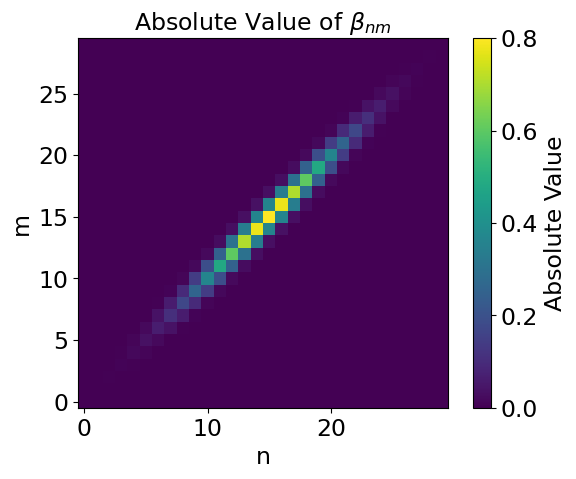

In [17]:
#plotting photon number probabilities

Tc = 0.1
Tp = 1
Bc = 0.8
fine_param = 1

mat_size = 15 * fine_param

    
B=beta_dg_f(mat_size,0,fine_param)

U, Q = sc.linalg.polar(B, side = "left")
detW = np.linalg.det(sech(Q))
    
T = np.matmul(tanh(Q),U)   
    
N=np.trace(np.linalg.matrix_power(sinh(Q),2))

plt.imshow(np.transpose(np.abs(B)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

30


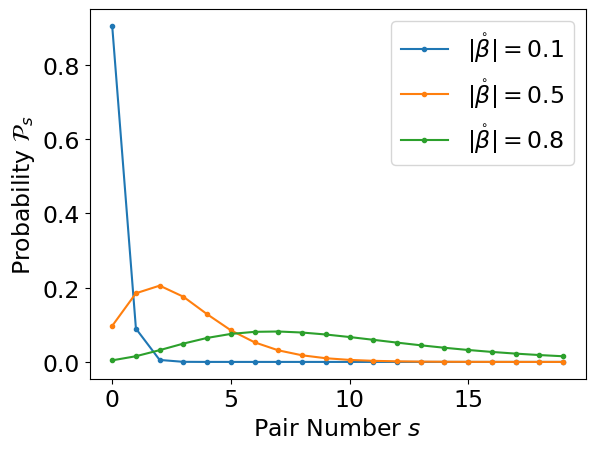

In [18]:
#plotting photon number probs
Bclist = [0.1,0.5,0.8]
Tc = 0.1
Tp = 1
fine_param = 1
mat_size = 15 * fine_param
s_list = range(20)

for bc in Bclist:
    
    Bc = bc
    B=beta_dg_f(mat_size,0,fine_param)
    U, Q = sc.linalg.polar(B, side = "left")
    detW = np.linalg.det(sech(Q))
    T = np.matmul(tanh(Q),U)   
    N=np.trace(np.linalg.matrix_power(sinh(Q),2))

    Ps_list = []
    for s in s_list:
        Ps_list.append(P_s(s))
    plt.plot(s_list, Ps_list, marker=".", label=r"$|\mathring{\beta}|=$"+str(Bc))    


plt.xlabel("Pair Number $s$")
plt.ylabel(r"Probability $\mathcal{P}_s$")
plt.legend(fontsize=fsize)
plt.savefig("P_Num_Probs.pdf", bbox_inches='tight')
print(len(B))

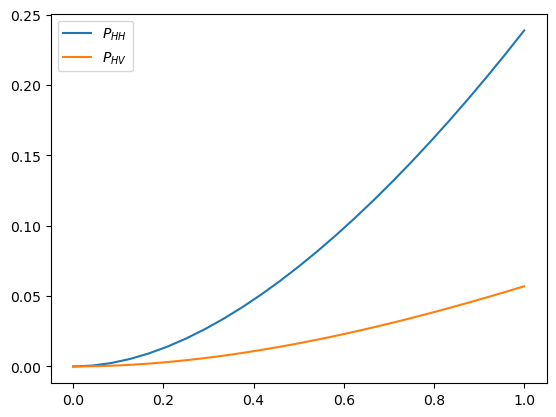

In [120]:
#plotting raw coincidence probs

cutoff = 10
alpha_list = np.linspace(0,1,25)
P_HH = []
P_HV = []
for a in alpha_list:
    P_HH.append(PHH(10,a))
    P_HV.append(PHV(10,a))
    
plt.plot(alpha_list, P_HH, label="$P_{HH}$")
plt.plot(alpha_list, P_HV, label="$P_{HV}$")
plt.legend()
plt.show()
    

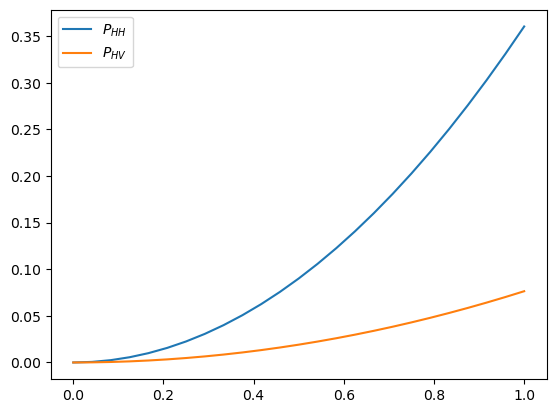

In [121]:
#plotting small alpha coincidence probs

cutoff = 10
alpha_list = np.linspace(0,1,25)
P_HH = []
P_HV = []
for a in alpha_list:
    P_HH.append(PHH_low(a))
    P_HV.append(PHV_low(a))
    
plt.plot(alpha_list, P_HH, label="$P_{HH}$")
plt.plot(alpha_list, P_HV, label="$P_{HV}$")
plt.legend()
plt.show()
    

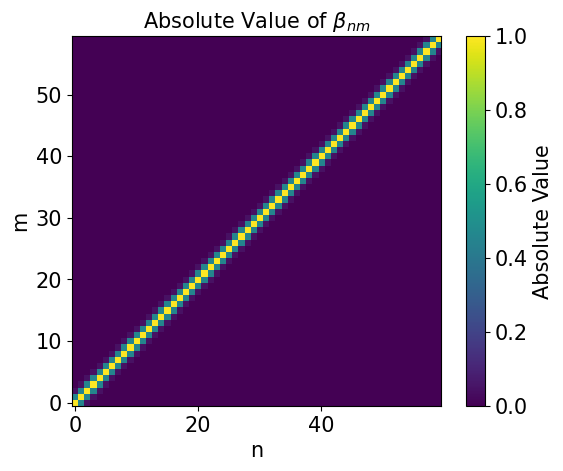

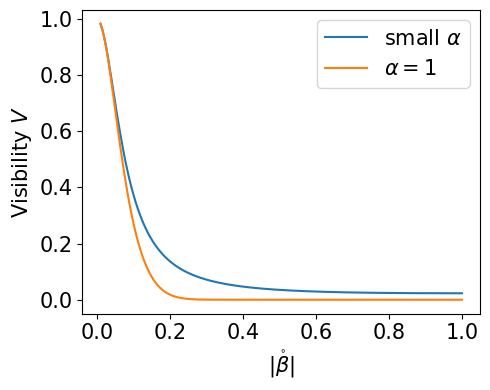

In [55]:
#plotting visibility vs beta_circ

Tc = 0.001
Tp = 1

fine_param = 1

mat_size = 30 * fine_param

Bc_vals = np.linspace(0.01, 1, 200)
Vlow_list = []
V1_list = []

    
for bc in Bc_vals:
    Bc = bc
    B = beta_dg_f(mat_size,0,fine_param)
    U, Q = sc.linalg.polar(B, side = "left")
    detW = np.linalg.det(sech(Q))
    T = np.matmul(tanh(Q),U)   
    N=np.trace(np.linalg.matrix_power(sinh(Q),2))
    
    Vlow = (PHH_low(1) - PHV_low(1)) / (PHH_low(1) + PHV_low(1))
    V1 = (PHH_1() - PHV_1()) / (PHH_1() + PHV_1())
    
    Vlow_list.append(Vlow)
    V1_list.append(V1)
    
plt.imshow(np.transpose(np.abs(B)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()
    
plt.figure(figsize=(5,4))
plt.plot(Bc_vals, Vlow_list, label=r"small $\alpha$")
plt.plot(Bc_vals, V1_list, label=r"$\alpha=1$")
plt.ylabel(r"Visibility $V$", fontsize=fsize)
plt.xlabel(r"$|\mathring{\beta}|$", fontsize=fsize)
plt.legend(fontsize=fsize)
plt.tight_layout()
plt.savefig("Coincidence_Visibilities.png")
plt.show()

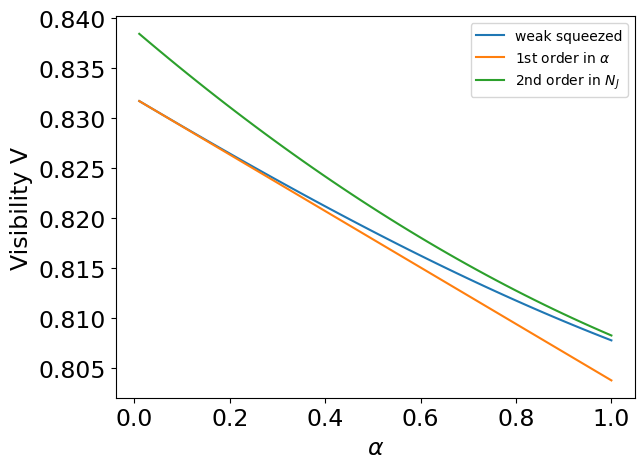

In [10]:
#plotting visibility for weak squeezing equation vs. alpha

Tc = 0.1
Tp = 1
Bc = 0.1

fine_param = 1

mat_size = 10 * fine_param


alpha_vals = np.linspace(0.01, 1, 50)
Vweak_list = []
alpha_series_list = []
N_series_list = []

B = beta_dg_f(mat_size,0,fine_param)
U, Q = sc.linalg.polar(B, side = "left")
detW = np.linalg.det(sech(Q))
T = np.matmul(tanh(Q),U)   
N = np.trace(np.linalg.matrix_power(sinh(Q),2))

def alpha_series(alpha):
    return 1/(1+2*N) - 4*N**2*alpha/(1+2*N)**2

def N_series(alpha):
    return 1 - 2*N + (4-4*alpha+alpha**2)*N**2

    
for a in alpha_vals:
    
    Vweak = (PHH_weak(a) - PHV_weak(a)) / (PHH_weak(a) + PHV_weak(a))
    Vweak_list.append(Vweak)
    alpha_series_list.append(alpha_series(a))
    N_series_list.append(N_series(a))
    
    
plt.plot(alpha_vals, Vweak_list, label=r"weak squeezed")
plt.plot(alpha_vals, alpha_series_list, label=r"1st order in $\alpha$")
plt.plot(alpha_vals, N_series_list, label=r"2nd order in $N_J$")
plt.ylabel("Visibility V")
plt.xlabel(r"$\alpha$")
plt.tight_layout()
plt.savefig("Weak_Vis.pdf")
plt.legend()
plt.show()

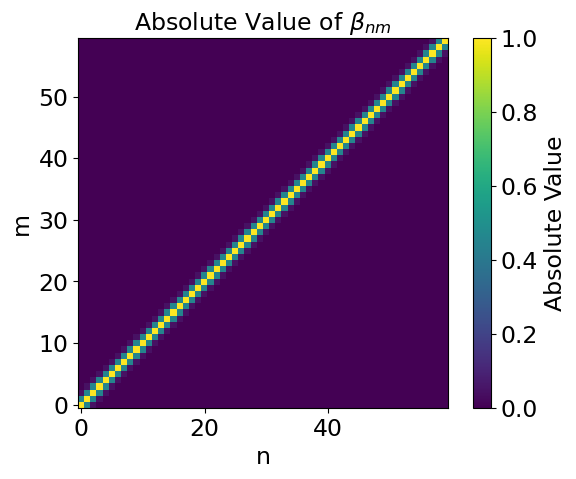

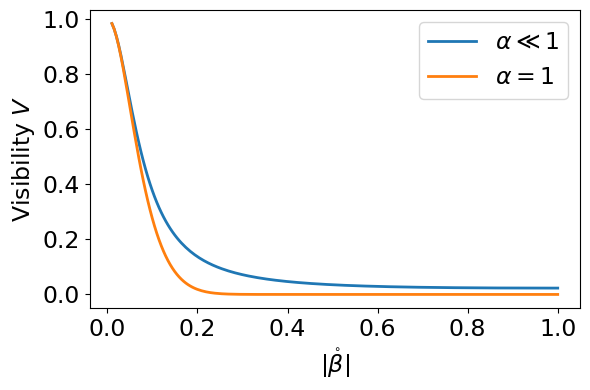

In [25]:
#plotting visibility vs beta_circ in CW limit

#plot line width
wsize=2

def rnm_dg_CW(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4)

def beta_dg_CW(num,k):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_dg_CW(n,m-k))
        r.append(row)
        
    return Bc*np.array(r)

Tc = 0.001
Tp = 1

fine_param = 1

mat_size = 30 * fine_param

Bc_vals = np.linspace(0.01, 1, 200)
Vlow_list = []
V1_list = []

    
for bc in Bc_vals:
    Bc = bc
    B = beta_dg_CW(mat_size,0)
    U, Q = sc.linalg.polar(B, side = "left")
    detW = np.linalg.det(sech(Q))
    T = np.matmul(tanh(Q),U)   
    N=np.trace(np.linalg.matrix_power(sinh(Q),2))
    
    Vlow = (PHH_low(1) - PHV_low(1)) / (PHH_low(1) + PHV_low(1))
    V1 = (PHH_1() - PHV_1()) / (PHH_1() + PHV_1())
    
    Vlow_list.append(Vlow)
    V1_list.append(V1)
    
plt.imshow(np.transpose(np.abs(B)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()
    
plt.figure(figsize=(6,4))
plt.plot(Bc_vals, Vlow_list, label=r"$\alpha\ll 1$", linewidth=wsize)
plt.plot(Bc_vals, V1_list, label=r"$\alpha=1$", linewidth=wsize)
plt.ylabel(r"Visibility $V$", fontsize=fsize)
plt.xlabel(r"$|\mathring{\beta}|$", fontsize=fsize)
plt.legend(fontsize=fsize)
plt.tight_layout()
plt.savefig("Coincidence_Visibilities.pdf")
plt.show()